# Handwritten Digit Recognition Project 🚀

Welcome to our exciting journey into the world of Deep Learning! In this project, I'll dive into the fascinating realm of handwritten digit recognition using PyTorch, one of the most popular machine learning libraries. 🧠💻


## Loading the MNIST Dataset 📚





In [80]:
# Import math  libraries
import matplotlib.pyplot as plt
import numpy as np

In [81]:
# Import necessary libraries
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define a transform to normalize the data
transform = transforms.Compose([
    #convering images to PyTorch tensors
    transforms.ToTensor(),
    #normalize pixel value
    transforms.Normalize((0.5,),(0.5,))
])

# Load the MNIST dataset
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

In [82]:
# Number of images in the train_set and test_set.
trainImages = len(train_set)
testImages = len(test_set)
print(f"the number of images in the train set is {trainImages}")
print(f"the number of images in the test set is {testImages}")

the number of images in the train set is 60000
the number of images in the test set is 10000


## Building the Simple Neural Network Model 🛠️



In [83]:
# Import necessary PyTorch libraries
import torch.nn as nn
import torch.nn.functional as F

# Define the neural network class
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Define layers of the neural network
        self.fc1 = nn.Linear(28*28,10) # First fully connected layer


    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        x = self.fc1(x) # activation function
        return F.log_softmax(x, dim=1)

# Create an instance of the network
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


## Training the Simple Neural Network Model 🏋️‍♀️🏋️‍♂️



In [84]:
# Import optimizer
from torch.optim import SGD

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss() #loss function
optimizer = SGD(model.parameters(), lr=0.01) # Stochastic gradient descent

# Set the number of epochs
num_epochs = 50
listOfTrainLoss1 = []
listOfTestLoss1 = []
# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:

        optimizer.zero_grad()

        outputs = model(images)

        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    else:
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")
    listOfTrainLoss1.append(running_loss)


    test_loss = 0.0
    with torch.no_grad():
       for images, labels in test_loader:
          # Complete evaluation pass
          outputs = model(images)

          testloss = criterion(outputs, labels)

          test_loss += loss.item()

       else:
            print(f" Loss: {test_loss/len(test_loader)}")
       listOfTestLoss1.append(test_loss)



print("Training is finished!")

Epoch 1, Loss: 0.6141843310773754
 Loss: 0.6660417318344116
Epoch 2, Loss: 0.38672970306835197
 Loss: 0.4520352780818939
Epoch 3, Loss: 0.35247498026280516
 Loss: 0.26072922348976135
Epoch 4, Loss: 0.33515917726639494
 Loss: 0.17690853774547577
Epoch 5, Loss: 0.32378862106374334
 Loss: 0.29646554589271545
Epoch 6, Loss: 0.3160526106304833
 Loss: 0.344521701335907
Epoch 7, Loss: 0.3098516564712977
 Loss: 0.28067484498023987
Epoch 8, Loss: 0.3053064957769441
 Loss: 0.9132686853408813
Epoch 9, Loss: 0.3011090872463768
 Loss: 0.2595131993293762
Epoch 10, Loss: 0.29811394774217975
 Loss: 0.35089465975761414
Epoch 11, Loss: 0.2952973811563525
 Loss: 0.37354451417922974
Epoch 12, Loss: 0.29209294730126223
 Loss: 0.13798704743385315
Epoch 13, Loss: 0.2902956069675463
 Loss: 0.30865758657455444
Epoch 14, Loss: 0.28823132900350384
 Loss: 0.15684780478477478
Epoch 15, Loss: 0.28625188812391084
 Loss: 0.42878368496894836
Epoch 16, Loss: 0.28492184741092896
 Loss: 0.16419506072998047
Epoch 17, Loss

#Simple Model Evaluation


In [85]:
import torch
model.eval()

correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the simple model on the test images: {accuracy:.2f}%')

Accuracy of the simple model on the test images: 92.22%


# The Simple Model Complexity Graph
The graph shows the training and test loss of simple model over 10 epochs.

*   The training loss (blue) steadily decreases, indicating learning and        improvement.
*   The test loss (orange) fluctuates slightly but does not show a clear trend, suggesting the model is generalizing without significant overfitting.




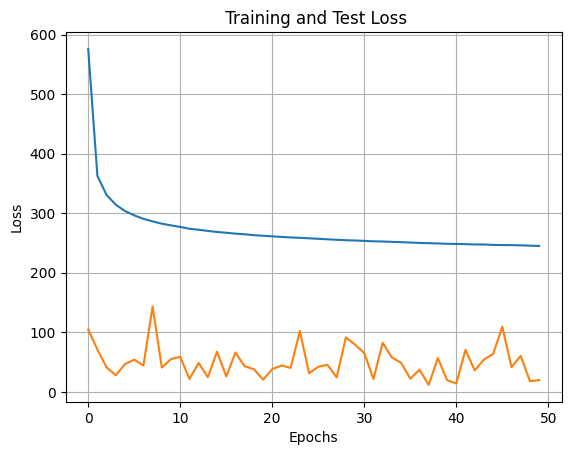

In [86]:
listOfEpoch = np.arange(len(listOfTrainLoss1))
plt.plot(listOfEpoch , listOfTrainLoss1 , label ='Train loss')
plt.plot(listOfEpoch , listOfTestLoss1 , label ='Train loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.title(" Training and Test Loss")
plt.show()

#Building The Complex Neural Network Model 🛠️

In [87]:
# Import necessary PyTorch libraries
import torch.nn as nn
import torch.nn.functional as F

# Define the neural network class
class NetComplex(nn.Module):
    def __init__(self):
        super(NetComplex, self).__init__()
        # Define layers of the neural network
        self.fc1 = nn.Linear(784,1024) # First fully connected layer
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512,256)
        self.fc4 = nn.Linear(256,128)
        self.fc5 = nn.Linear(128,64)
        self.fc6 = nn.Linear(64,32)
        self.fc7 = nn.Linear(32,10)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28*28)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=F.relu(self.fc4(x))
        x=F.relu(self.fc5(x))
        x=F.relu(self.fc6(x))
        x = self.fc7(x)


        return F.log_softmax(x, dim=1)

# Create an instance of the network
modelComplex = NetComplex()
print(modelComplex)

NetComplex(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=64, bias=True)
  (fc6): Linear(in_features=64, out_features=32, bias=True)
  (fc7): Linear(in_features=32, out_features=10, bias=True)
)


## Training the Complex  Neural Network Model 🏋️‍♀️🏋️‍♂️



In [88]:
# Import optimizer
from torch.optim import SGD

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss() #loss function
optimizer = SGD(modelComplex.parameters(), lr=0.01) # Stochastic gradient descent

# Set the number of epochs
num_epochs = 50
listOfTrainLoss2 = []
listOfTestLoss2 = []
# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:

        optimizer.zero_grad()

        outputs = modelComplex(images)

        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    else:
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")
    listOfTrainLoss2.append(running_loss)


    test_loss = 0.0
    with torch.no_grad():
       for images, labels in test_loader:
          # Complete evaluation pass
          outputs = modelComplex(images)

          testloss = criterion(outputs, labels)

          test_loss += loss.item()

       else:
            print(f" Loss: {test_loss/len(test_loader)}")
       listOfTestLoss2.append(test_loss)



print("Training is finished!")

Epoch 1, Loss: 2.3014100777314925
 Loss: 2.305957794189453
Epoch 2, Loss: 2.2942972180685763
 Loss: 2.2877044677734375
Epoch 3, Loss: 2.205602258253199
 Loss: 1.8248682022094727
Epoch 4, Loss: 1.5569934476413199
 Loss: 1.0804344415664673
Epoch 5, Loss: 0.7916167444829494
 Loss: 0.6506920456886292
Epoch 6, Loss: 0.48408006150712335
 Loss: 0.22679191827774048
Epoch 7, Loss: 0.3311285091711006
 Loss: 0.10150781273841858
Epoch 8, Loss: 0.25556479155350087
 Loss: 0.17853133380413055
Epoch 9, Loss: 0.2065178233184921
 Loss: 0.05655939131975174
Epoch 10, Loss: 0.17332269043238688
 Loss: 0.05674715340137482
Epoch 11, Loss: 0.14746800478873476
 Loss: 0.05900216102600098
Epoch 12, Loss: 0.12802815354312025
 Loss: 0.057768844068050385
Epoch 13, Loss: 0.1094819580379532
 Loss: 0.12319426983594894
Epoch 14, Loss: 0.09748510976852194
 Loss: 0.046972889453172684
Epoch 15, Loss: 0.08435955112139736
 Loss: 0.051106177270412445
Epoch 16, Loss: 0.07332732239569317
 Loss: 0.005298482719808817
Epoch 17, Lo

#Complex Model Evaluation


In [89]:
import torch
modelComplex.eval()

correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = modelComplex(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the complex model on the test images: {accuracy:.2f}%')

Accuracy of the complex model on the test images: 97.61%


# The Complex Model Complexity Graph
the graph shows the training and test loss of Complex model over 50 epochs.
The training loss (blue) drops quickly, meaning the model is effectively learning from the training data. The test loss (orange) decreases as well, which is good because it means the model is also predicting new, unseen data accurately.


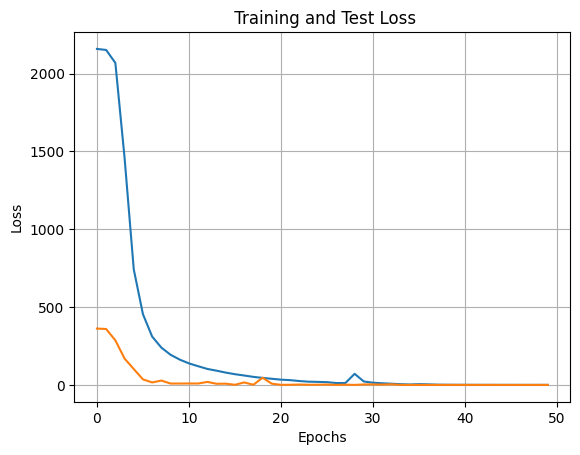

In [90]:
listOfEpoch = np.arange(len(listOfTrainLoss2))
plt.plot(listOfEpoch , listOfTrainLoss2 , label ='Train loss')
plt.plot(listOfEpoch , listOfTestLoss2 , label ='Train loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.title(" Training and Test Loss")
plt.show()

## Implementing Early Stopping 🛑



In [95]:
num_epochs = 50
patience = 5
min_delta = 0.01
best_loss = None
patience_counter = 0

# Training loop with early stopping
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        # Training pass
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # evaluation phase
    model.eval()
    test_set_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            output = model(images)
            test_loss += loss.item()

    # Calculate average losses
    training_loss = running_loss / len(train_loader)
    test_loss /= len(test_loader)

    print(f"Epoch {epoch+1}, Training Loss: {training_loss}, test Loss: {test_loss}")

    # Early stopping logic
    if best_loss is None or test_loss < best_loss - min_delta:
        best_loss = test_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!")
            break

print("Training is finished!")

Epoch 1, Training Loss: 0.2607711819983495, test Loss: 0.3075343067452325
Epoch 2, Training Loss: 0.26069896562553163, test Loss: 0.17401391267460434
Epoch 3, Training Loss: 0.2606760823785433, test Loss: 0.1302344706027929
Epoch 4, Training Loss: 0.26072692633596567, test Loss: 0.22533993530954857
Epoch 5, Training Loss: 0.26064536034234803, test Loss: 0.07292655001898264
Epoch 6, Training Loss: 0.26067367739387665, test Loss: 0.12507932020289247
Epoch 7, Training Loss: 0.2606755830982982, test Loss: 0.12898590459268452
Epoch 8, Training Loss: 0.26075967319452686, test Loss: 0.28676385252426645
Epoch 9, Training Loss: 0.26094017196883523, test Loss: 0.6263835396336871
Epoch 10, Training Loss: 0.2608275087133272, test Loss: 0.41719026130600295
Early stopping triggered!
Training is finished!


#Early Stopping Model Evaluation



In [103]:
import torch
model.eval()

correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the Early Stopping model on the test images: {accuracy:.2f}%')

Accuracy of the Early Stopping model on the test images: 92.22%


##**min_delta :** minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.

##**patience :** number of epochs with no improvement after which training will be stopped


# The different from the first training is that the model have the same accuracy but it train only with 10 epochs not like the first it train with 50 epochs (the model is simple and if I play with the hyper parameters of Early Stopping I will get better Accuracy)

## Experimenting with Dropout 🌧️



In [99]:
class NetWithDropout(nn.Module):
    def __init__(self):
        super(NetWithDropout, self).__init__()
        # Define layers of the neural network
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout1 = nn.Dropout()  # Dropout layer with 20% probability
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout()  # Dropout layer with 50% probability
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        # Forward pass with dropout
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Create an instance of the network with dropout
model_with_dropout = NetWithDropout()
print(model_with_dropout)

NetWithDropout(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


#Training the Neural Network Model With Dropout 🏋️‍♀️🏋️‍♂️



In [100]:
# Import optimizer
from torch.optim import SGD

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss() #loss function
optimizer = SGD(model.parameters(), lr=0.01) # Stochastic gradient descent

# Set the number of epochs
num_epochs = 50
listOfTrainLoss3 = []
listOfTestLoss3 = []
# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:

        optimizer.zero_grad()

        outputs = model_with_dropout(images)

        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    else:
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")
    listOfTrainLoss3.append(running_loss)


    test_loss = 0.0
    with torch.no_grad():
       for images, labels in test_loader:
          # Complete evaluation pass
          outputs = model_with_dropout(images)

          testloss = criterion(outputs, labels)

          test_loss += loss.item()

       else:
            print(f" Loss: {test_loss/len(test_loader)}")
       listOfTestLoss3.append(test_loss)



print("Training is finished!")

Epoch 1, Loss: 2.333347436715799
 Loss: 2.2992334365844727
Epoch 2, Loss: 2.3341307248642194
 Loss: 2.311828851699829
Epoch 3, Loss: 2.334817451454683
 Loss: 2.323716163635254
Epoch 4, Loss: 2.3343127737167295
 Loss: 2.2926833629608154
Epoch 5, Loss: 2.3337506208338463
 Loss: 2.383882761001587
Epoch 6, Loss: 2.333896638487956
 Loss: 2.3433077335357666
Epoch 7, Loss: 2.3333676176538853
 Loss: 2.3200929164886475
Epoch 8, Loss: 2.3343438952208073
 Loss: 2.339994192123413
Epoch 9, Loss: 2.3347145474033315
 Loss: 2.4026715755462646
Epoch 10, Loss: 2.3337060518102097
 Loss: 2.313587188720703
Epoch 11, Loss: 2.334536322906836
 Loss: 2.3072080612182617
Epoch 12, Loss: 2.334162146552031
 Loss: 2.3220179080963135
Epoch 13, Loss: 2.3344966076584512
 Loss: 2.3364264965057373
Epoch 14, Loss: 2.3340193879629756
 Loss: 2.3493289947509766
Epoch 15, Loss: 2.3334095188295407
 Loss: 2.3550403118133545
Epoch 16, Loss: 2.3330367236757583
 Loss: 2.335313320159912
Epoch 17, Loss: 2.3333443769259747
 Loss: 2.

#Model With Dropout Evaluation

In [102]:
import torch
model_with_dropout.eval()

correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model_with_dropout(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model with dropout on the test images: {accuracy:.2f}%')

Accuracy of the model with dropout on the test images: 11.26%


# The Complex Model Complexity Graph
the graph shows the training and test loss of Complex model over 10 epochs.

 Both losses are low and flat, indicating little change through the epochs, which may suggest that the model is not learning from the data.


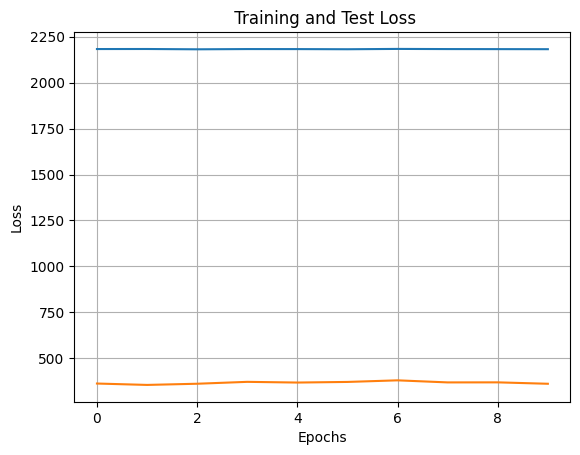

In [96]:
listOfEpoch = np.arange(len(listOfTrainLoss3))
plt.plot(listOfEpoch , listOfTrainLoss3 , label ='Train loss')
plt.plot(listOfEpoch , listOfTestLoss3 , label ='Train loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.title(" Training and Test Loss")
plt.show()

##The Model with dropout is not Learning